In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
df=pd.read_csv('/content/train.csv')

In [20]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Id                 1460 non-null   int64   
 1   MSSubClass         1460 non-null   int64   
 2   MSZoning           1460 non-null   object  
 3   LotFrontage        1201 non-null   float64 
 4   LotArea            1460 non-null   int64   
 5   Street             1460 non-null   object  
 6   Alley              91 non-null     object  
 7   LotShape           1460 non-null   object  
 8   LandContour        1460 non-null   object  
 9   Utilities          1460 non-null   object  
 10  LotConfig          1460 non-null   object  
 11  LandSlope          1460 non-null   object  
 12  Neighborhood       1460 non-null   object  
 13  Condition1         1460 non-null   object  
 14  Condition2         1460 non-null   object  
 15  BldgType           1460 non-null   object  
 16  HouseS

In [47]:
df.shape

(1460, 82)

In [23]:
features = ["GrLivArea","BedroomAbvGr","FullBath"]


In [24]:
x = df[features]


In [25]:
y = df["SalePrice"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [27]:
model = LinearRegression()

In [28]:
model.fit(x_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import r2_score

In [30]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

In [31]:
r2 = r2_score(y_test, y_pred)

In [32]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2806426667.247853
R-squared: 0.6341189942328371


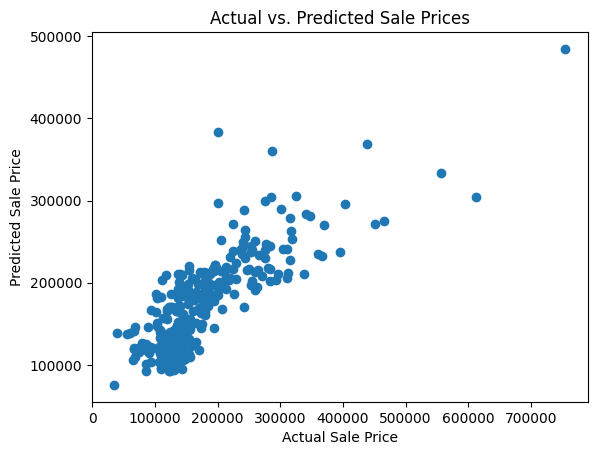

In [33]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Prices")
plt.show()

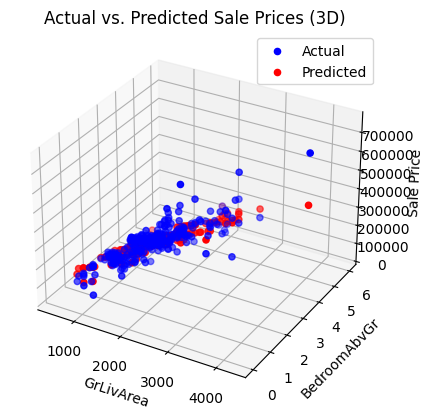

In [55]:
# prompt: actual vs predicted sale 3d price graph

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming you have x_test, y_test, and y_pred from your code

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_test_values = x_test.values  # Convert DataFrame to numpy array
ax.scatter(x_test_values[:, 0], x_test_values[:, 1], y_test, c='blue', label='Actual')
ax.scatter(x_test_values[:, 0], x_test_values[:, 1], y_pred, c='red', label='Predicted')

ax.set_xlabel(x_test.columns[0])
ax.set_ylabel(x_test.columns[1])
ax.set_zlabel('Sale Price')
ax.set_title('Actual vs. Predicted Sale Prices (3D)')
ax.legend()

plt.show()

In [34]:
new_data = pd.DataFrame({"GrLivArea": [1500], "BedroomAbvGr": [3], "FullBath": [2]})

In [35]:
predicted_price = model.predict(new_data)


In [36]:
print(f'Predicted Price:{predicted_price[0]}')

Predicted Price:188364.36129123066


In [39]:

test_df = pd.read_csv('/content/test.csv')


test_features = ["GrLivArea", "BedroomAbvGr", "FullBath"]
test_x = test_df[features]


test_y_pred = model.predict(test_x)


print(test_y_pred)

[122173.31310421 140561.53868318 201783.75489581 ... 102983.61108955
 103216.09446577 240377.51479736]


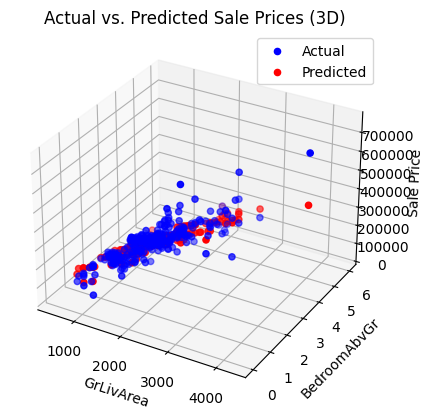

Total Difference between actual and predicted values: 10450113.897391398


In [58]:
# prompt: train and test data graphh total difrance acuraccy

# Assuming you have x_test, y_test, and y_pred from your code

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_test_values = x_test.values  # Convert DataFrame to numpy array
ax.scatter(x_test_values[:, 0], x_test_values[:, 1], y_test, c='blue', label='Actual')
ax.scatter(x_test_values[:, 0], x_test_values[:, 1], y_pred, c='red', label='Predicted')

ax.set_xlabel(x_test.columns[0])
ax.set_ylabel(x_test.columns[1])
ax.set_zlabel('Sale Price')
ax.set_title('Actual vs. Predicted Sale Prices (3D)')
ax.legend()

plt.show()

total_difference = np.sum(np.abs(y_test - y_pred))
print(f"Total Difference between actual and predicted values: {total_difference}")


